In [1]:
import pandas as pd


In [2]:
vuelos=  pd.read_csv('/content/On_Time_On_Time_Performance_2015_2ac.csv',sep=";")
vuelos.head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,UniqueCarrier,AirlineID,Carrier,TailNum,...,Div4WheelsOff,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum
0,2015,1,2,23,1,23/02/2015,AS,19930,AS,N796AS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,2,15,7,15/02/2015,AS,19930,AS,N708AS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,2,22,7,22/02/2015,AS,19930,AS,N706AS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,2,10,2,10/02/2015,OO,20304,OO,N912EV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,2,8,7,8/02/2015,AS,19930,AS,N765AS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df = vuelos.dropna(axis=1, how='all')
df.head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,UniqueCarrier,AirlineID,Carrier,TailNum,...,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FirstDepTime,TotalAddGTime,LongestAddGTime,DivAirportLandings
0,2015,1,2,23,1,23/02/2015,AS,19930,AS,N796AS,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,2015,1,2,15,7,15/02/2015,AS,19930,AS,N708AS,...,1,0.0,26.0,0.0,0.0,0.0,NaN,NaN,NaN,0
2,2015,1,2,22,7,22/02/2015,AS,19930,AS,N706AS,...,1,0.0,0.0,6.0,0.0,16.0,NaN,NaN,NaN,0
3,2015,1,2,10,2,10/02/2015,OO,20304,OO,N912EV,...,1,0.0,0.0,12.0,0.0,75.0,NaN,NaN,NaN,0
4,2015,1,2,8,7,8/02/2015,AS,19930,AS,N765AS,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [4]:
vuelosSeleccionados=vuelos[["ArrTime","ArrDelay","ArrDelayMinutes","DepDelay","DepTime"]]
vuelosSeleccionados.head()

,ArrTime,ArrDelay,ArrDelayMinutes,DepDelay,DepTime
0,1128,3,3,-8,1052
1,1151,26,26,30,1130
2,1610,22,22,16,1540
3,2315,87,87,75,2220
4,1550,2,2,6,1530


In [5]:
vuelosSeleccionados[vuelosSeleccionados["DepDelay"]>0]
vuelosSeleccionados.corr()

,ArrTime,ArrDelay,ArrDelayMinutes,DepDelay,DepTime
ArrTime,1.000000,0.042296,0.042296,0.072206,0.765966
ArrDelay,0.042296,1.000000,1.000000,0.955694,0.109110
ArrDelayMinutes,0.042296,1.000000,1.000000,0.955694,0.109110
DepDelay,0.072206,0.955694,0.955694,1.000000,0.149854
DepTime,0.765966,0.109110,0.109110,0.149854,1.000000


In [6]:
import seaborn as sns

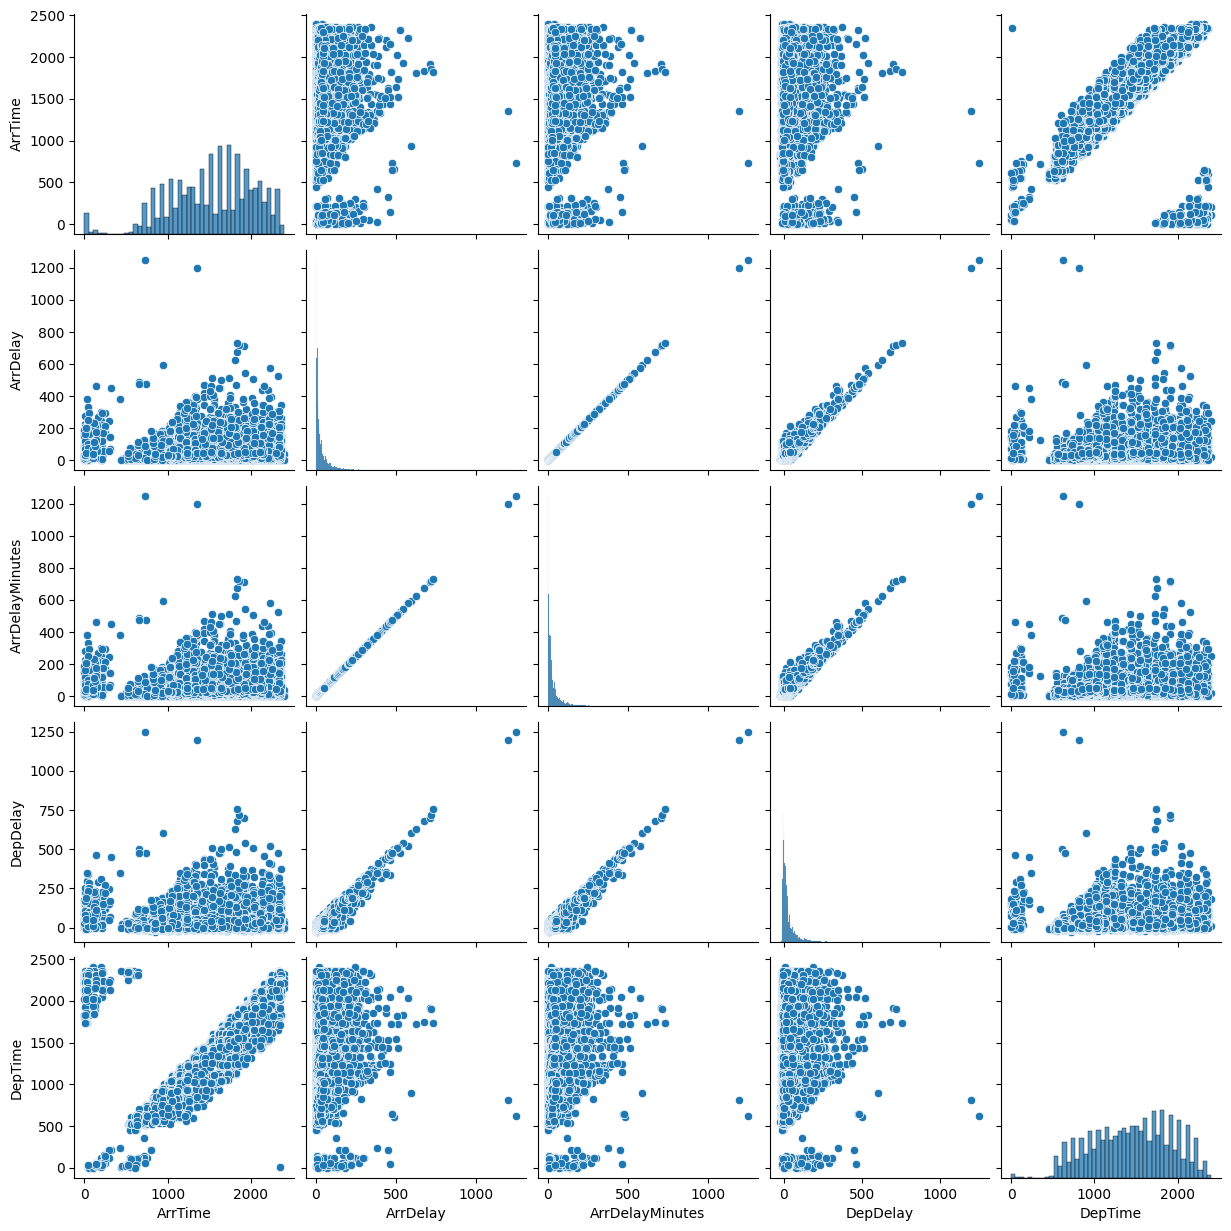

In [11]:
sns.pairplot(vuelosSeleccionados)

<Axes: xlabel='ArrDelay', ylabel='DepDelay'>

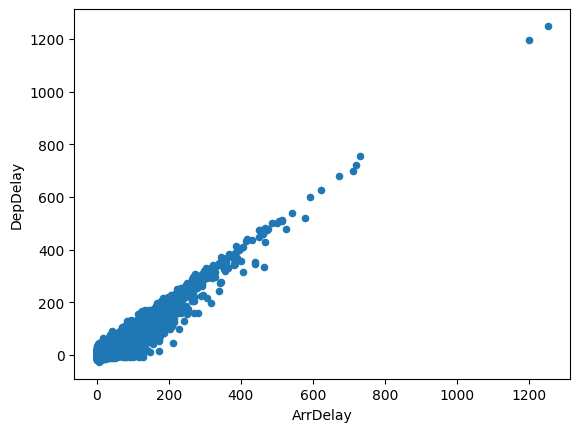

In [87]:
vuelosSeleccionados.plot(kind='scatter',x='ArrDelay',y='DepDelay')


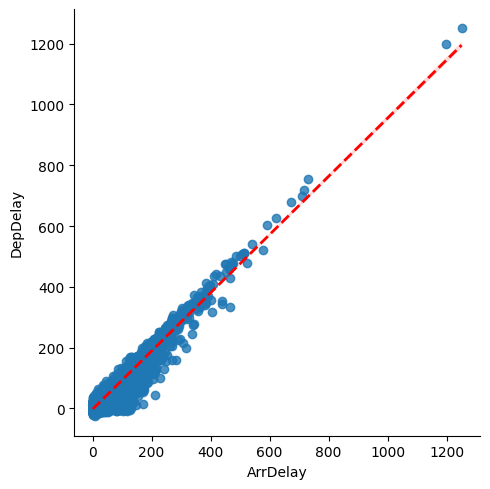

In [7]:
import seaborn as sns
sns.lmplot(data=vuelosSeleccionados, x='ArrDelay', y='DepDelay',line_kws={'color': 'red', 'linewidth': 2, 'linestyle': '--'})

In [9]:
#bibliote numérica
import numpy as np


In [57]:
#seleccionar un conjunto de datos aleatorio
#seleccionamos hasta el 80% de datos para entrenamiento
CojuntoEntrenamiento=np.random.rand(len(vuelosSeleccionados))<0.8


In [58]:
#80% de entrenamiento
Train=vuelosSeleccionados[CojuntoEntrenamiento]
#20% de datos para pruebas
Test=vuelosSeleccionados[~CojuntoEntrenamiento]

In [26]:
Train.shape

(17748, 5)

In [27]:
Test.shape

(4391, 5)

In [31]:
#importo el modelo de regresión Lineal
from sklearn.linear_model import LinearRegression

In [37]:
#separo las variables, variable independiente(X) de la dependiente(Y)
Train_X=Train[["DepDelay"]]
Train_Y=Train[["ArrDelay"]]

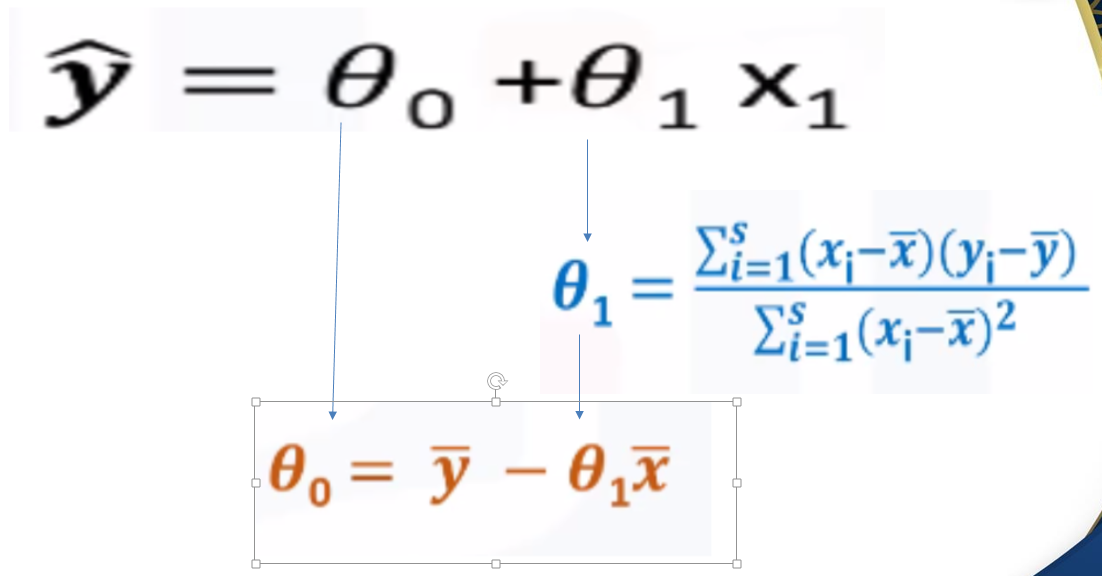

In [38]:
#pasar a vector
Train_X= np.asanyarray(Train_X)
Train_Y= np.asanyarray(Train_Y)

In [84]:
#otra forma para pasar a vector
Train_X= np.array(Train_X)
Train_Y= np.array(Train_Y)

In [55]:
#siempre todo modelo se entrena con la instrucción fit
#ya tiene los patrones de los datos
reg = LinearRegression().fit(Train_X, Train_Y)

In [56]:
#necesito sacer todo el y Calculado, Predecir
y_pred= reg.predict(Train_X)

In [42]:
#visualicemos el coeficiente y el intercepto
print('w: ', reg.coef_)
print('b: ', reg.intercept_)

w:  [[0.95575432]]
b:  [5.37989336]


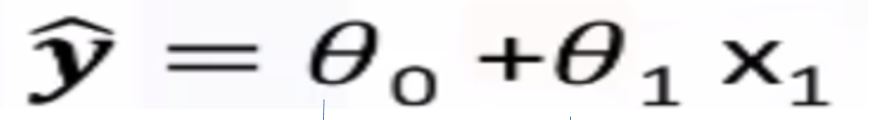

In [62]:
from sklearn.metrics import mean_squared_error
import numpy as np


In [63]:
mse=mean_squared_error(Train_Y, y_pred)
print(mse)

208.71907416890022


In [64]:
np.sqrt(mse)

np.float64(14.447113004642146)

In [59]:
from sklearn.metrics import r2_score

In [65]:
r2_score(Train_Y, y_pred)

0.9134295096978182

In [ ]:
#utilización del modelo

In [68]:

demoradelvuelo=reg.predict([[20]])
print("Demora en la llegada",demoradelvuelo)

Demora en la llegada [[24.49497967]]


In [79]:
dato=int(input("ingrese el dato"))
dato2=np.array([[dato]])
demoradelvuelo=reg.predict(dato2)
print("Demora en la llegada apróximada de:",demoradelvuelo)

ingrese el dato3
Demora en la llegada apróximada de: [[8.24715631]]


In [83]:
dato2=np.array([dato]).reshape(-1,1)
dato2.shape


(1, 1)